# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

## Get the Data

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve
from sklearn import metrics

# 1. Exploratory Data Analysis

In [3]:
df = pd.read_csv("data/Advertising.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# 2. Prepare Data for Logistic Regression


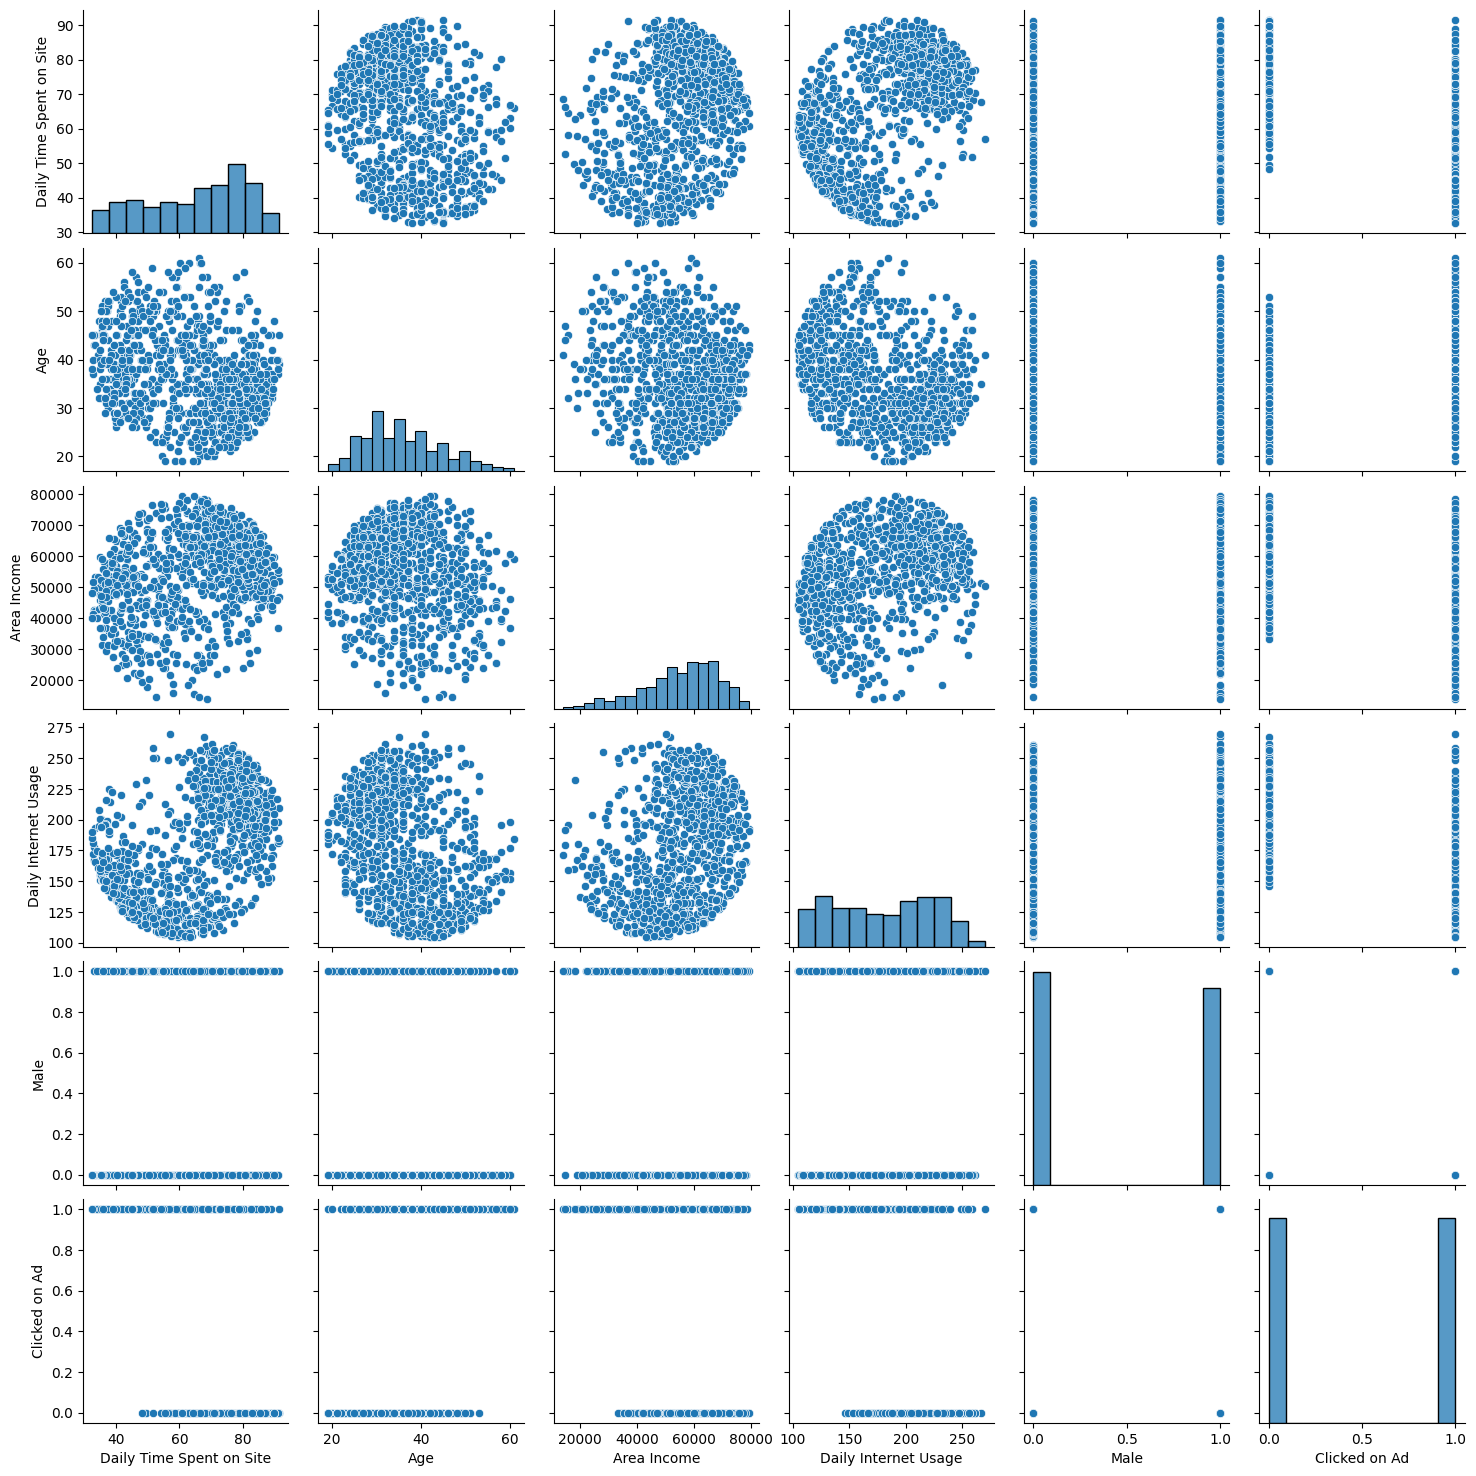

In [6]:
sns.pairplot(df)

In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [8]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [9]:
# Creo otro DataFrame solo con valores regresivos, borrando las columnas Dtype = object
df_val_reg = df.drop(df.columns[[4, 5, 7, 8]], axis=1)

In [10]:
df_val_reg

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


<Axes: >

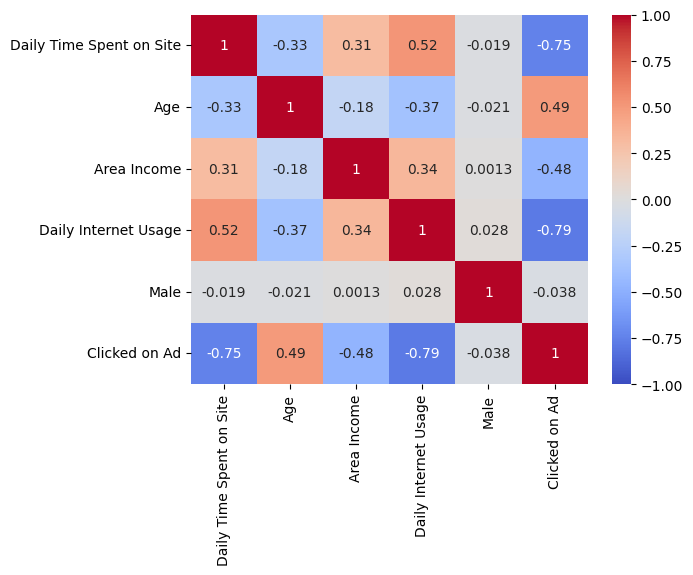

In [11]:
sns.heatmap(df_val_reg.corr(), annot= True, cmap="coolwarm", vmin=-1)


#### 2. Train test split


In [12]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
       
y = df['Clicked on Ad']   

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 11)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 5)
(800,)
(200, 5)
(200,)



#### 3. StandardScaler()


In [15]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
st.fit(X_train)

X_train_st = st.transform(X_train)
X_test_st = st.transform(X_test)

# 3. Implement a Logistic Regression in Scikit-Learn and predict.

In [16]:
# Itera 1000 veces todos los registros del DataFrame
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Max_iter es el parámetro que nos permite aumentar el número de iteraciones.

- Menos iteraciones, tarda menos pero se ajusta menos y la calidad de las predicciones puede bajar.

- Más iteraciones, tarda más. Puede sobre ajustar el modelo.

In [17]:
# Predicción con el modelo de regresión logística entrenado
pred = model.predict(X)
print(pred)

[0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1
 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1
 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0
 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1
 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1
 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 1 1 1 0 0 1 0 1 1 0 

Predict_proba() nos devuelve las probabilidad de pertenecer a cada clase.

In [18]:
# Predict_proba() -->  Indica la probabilidad de acierto de la target de cada muestra que ha predecido
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.99 0.01]
 [0.99 0.01]
 [0.99 0.01]
 ...
 [0.   1.  ]
 [0.1  0.9 ]
 [0.   1.  ]]


In [19]:
# Fiabilidad del funcionamiento del modelo
model.score(X, y)

0.972

In [20]:
# Indica la acción de click-ar SI/NO
model.classes_

array([0, 1])

# 4. Evaluation


#### 0. Accuracy

In [21]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

print("Accuracy;", accuracy_score(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

Accuracy; 0.985
[[107   2]
 [  1  90]]



#### 1. Confusion Matrix


In [22]:
c_matrix = confusion_matrix(y_test, pred)

c_matrix

array([[107,   2],
       [  1,  90]])

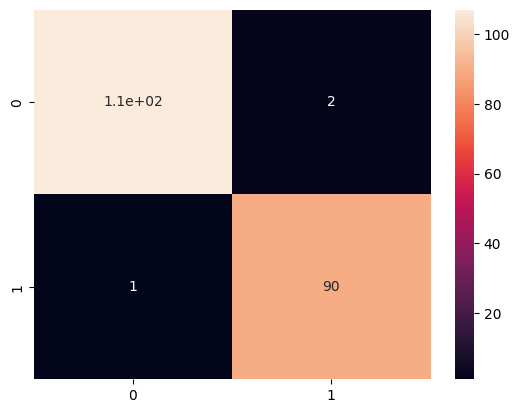

In [23]:
sns.heatmap(c_matrix, annot=True);


#### 2. Precision


Cuántos son realmente 1s, de todos los que ha predicho como 1s

TP / (TP + FP)

In [24]:
precision = precision_score(y_test, pred)
print("Precision:", pred)

Precision: [0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1
 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0
 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0
 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0]




#### 3. Recall


Cuántos has predicho como 1, de los que realmente eran 1s

TP / (TP + FN)

In [25]:
recall = recall_score(y_test, pred)
print("Recall:", recall)

Recall: 0.989010989010989




#### 4. F1 Score


2 * p * r / (r + p)

In [26]:
f1 = f1_score(y_test, pred)
print("F1-score:", f1)

F1-score: 0.9836065573770492




#### 5. ROC curve

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "--")  # Línea aleatoria
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

NameError: name 'roc_curve' is not defined



#### 6. P-R curve

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

NameError: name 'y_proba' is not defined

In [324]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       109
           1       0.98      0.99      0.98        91

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200

